Iteration 0: MSE=11.7320
Iteration 100: MSE=0.8074
Iteration 200: MSE=0.8066
Iteration 300: MSE=0.8066
Iteration 400: MSE=0.8066
Iteration 500: MSE=0.8066
Iteration 600: MSE=0.8066
Iteration 700: MSE=0.8066
Iteration 800: MSE=0.8066
Iteration 900: MSE=0.8066
梯度下降学到的参数: [4.21509616 2.77011339]


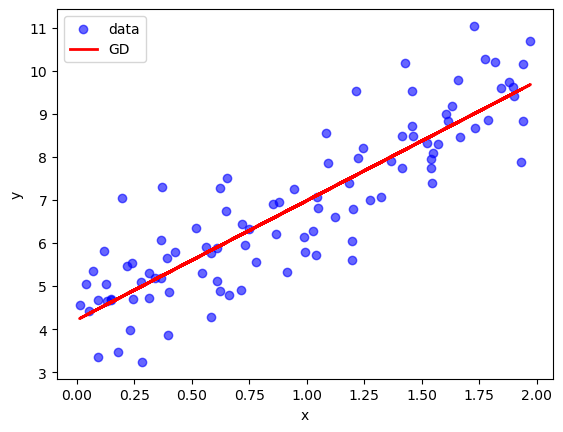

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# ============ 1. 生成合成数据 ============
np.random.seed(42)
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

# 在 X 前面加一列 1（偏置项 b）
X_b = np.c_[np.ones((100, 1)), X]  # (100,2)
# ============ 2. 批量梯度下降实现 ============
def mse(x_true, y_pred):
     """均方误差"""
     return np.mean((x_true - y_pred) ** 2)
#超参数
eta = 0.1 # 学习率
n_iterations = 1000  # 迭代次数
m = X_b.shape[0]  # 样本数量
theta=np.random.randn(2,1)  # 随机初始化参数 (2,1)
for iteration in range(n_iterations):
     gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)  # 计算梯度
     theta=theta-eta*gradients  # 更新参数
     if iteration % 100 == 0:
         y_pred = X_b.dot(theta)
         print(f"Iteration {iteration}: MSE={mse(y, y_pred):.4f}")
print("梯度下降学到的参数:", theta.ravel())
# ============ 3. 预测并画图 ============
y_pred = X_b.dot(theta)

plt.scatter(X, y, color="blue", alpha=0.6, label="data")
plt.plot(X, y_pred, color="red", linewidth=2, label="GD")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

目标函数收敛

初始迭代时 MSE 很大（11.7320）。

迭代到 ~200 步左右，MSE 就降到了 0.8066，之后基本稳定不再下降，说明 梯度下降收敛到了最优解附近。

学到的参数

θ = [4.21509616, 2.77011339]


θ₀ = 4.2151（偏置项 intercept）

θ₁ = 2.7701（斜率 slope）

也就是说，模型学到的函数大致是：𝑦^​=4.2151+2.7701⋅x

和真实数据对比
在 synthetic data 里我们最初设定的“真实”关系是：y=4+3x+ε

其中 
ε 是噪声。

学到的结果 [4.215, 2.770] 非常接近真实参数 [4, 3]。
差异主要来自：

数据里有随机噪声

梯度下降不一定完全等于解析解（OLS），但能学到近似解

结论

你的梯度下降实现是 正确的。

参数结果合理，说明模型学到了和真实关系接近的直线。

MSE 没法降到 0，是因为有噪声，哪怕完全知道真实直线，预测也不会完全贴合所有点。

